<a href="https://colab.research.google.com/github/NicolasM3/final_TIC/blob/master/versao_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TI602 - Tópicos Inovadores em Computação

#### Trabalho Final - CNN com CIFAR-10

---

#### Nomes
*   Felipe Pires Araujo
*   Marcelo Gouvea Sicoli
*   Nícolas Martins de Oliveira


*Trabalho desenvolvido utilizando Google Colab ou Jupyter*.

O trabalho tem como objetivo construir uma rede neural convolucional para construir um modelo de classficação do dataset CIFAR-10 e comparar diferentes soluções com gráficos.

# Configuração inicial

Aqui configuraremos as bibliotecas e o dataset. 

In [32]:
pip install tensorflow numpy sklearn matplotlib

## Bibliotecas

Outras bibliotecas serão utilizadas ao decorrer do projeto, porém aqui estão as principais. 


*   Usaremos o tensorflow para criar os modelos pré treinados
*   Usaremos o Sklearn para manipular o dataset e verifcar os modelos pré treinados
*   Usaremos o Numpy para trabalhar algumas operações matemáticas
*   Usaremos o Matplotlib para printar os gráficos


In [33]:
import tensorflow as tf
# import pandas as pd
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils, optimizers, regularizers, initializers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import numpy as np

import matplotlib.pyplot as plt

## Train, Validation e Test 

*   Dados de treinamento: usado para treinar o modelo.
*   Dados de validação: usado para comparação de diferentes modelos e    hiperparâmetros.
*   Dados de teste: usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.



In [34]:
cifar10 = datasets.cifar10

# Carrega os dados, que já vem divididos em conjunto de treinamento e teste.
(x_trainVal, y_trainVal), (x_test, y_test) = cifar10.load_data()

In [35]:
x_train, x_validation, y_train, y_validation = train_test_split(x_trainVal, y_trainVal, test_size=0.2, random_state=42)

x_train = utils.normalize(x_train)
x_validation = utils.normalize(x_validation)

## Visualizando os dados


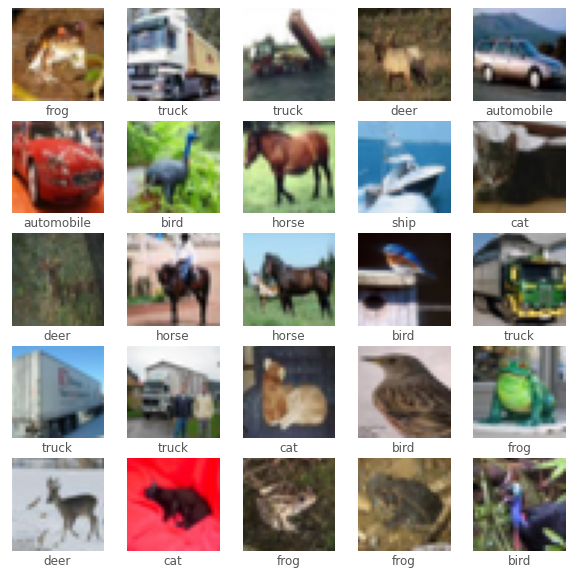

In [36]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_trainVal[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_trainVal[i][0]])
plt.show()

# Primeiro modelo

Nesse primeiro modelo vamos tentar um modelo simples, de 3 camadas onde em cada camada vamos duplicar o número de filtros e com filtro de ativação relu.

Depois de Planificarmos os dados, criaremos duas camadas.

## Criando

In [ ]:
# Baseline
model_baseline = Sequential()


#Operação de vetorização dos dados

#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32,32,3)))
model_baseline.add(MaxPooling2D(pool_size=(2, 2)))

model_baseline.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D(pool_size=(2, 2)))

model_baseline.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D(pool_size=(2, 2)))

model_baseline.add(Flatten())
model_baseline.add(Dense(64, activation='relu'))
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1250/1250 [==============================] - 21s 16ms/step - loss: 1.9479 - accuracy: 0.2810
Epoch 2/25
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5167 - accuracy: 0.4551
Epoch 3/25
1250/1250 [==============================] - 21s 16ms/step - loss: 1.3871 - accuracy: 0.5107
Epoch 4/25
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2643 - accuracy: 0.5544
Epoch 5/25
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1700 - accuracy: 0.5922
Epoch 6/25
1250/1250 [==============================] - 21s 16ms/step - loss: 1.1009 - accuracy: 0.6133
Epoch 7/25
1250/1250 [==============================] - 23s 18ms/step - loss: 1.0367 - accuracy: 0.6379
Epoch 8/25
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9709 - accuracy: 0.6594
Epoch 9/25
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9246 - accuracy: 0.6759
Epoch 10/25
1250/1250 [==============================] - 21s 17m

In [ ]:
model_baseline.save('first_model.h5')

## Analisando

In [ ]:
model_baseline.evaluate(x_validationdation, y_validation)

313/313 [==============================] - 2s 6ms/step - loss: 2.2263 - accuracy: 0.5687


[2.2262675762176514, 0.5687000155448914]

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()

In [ ]:
predictions = model_baseline.predict_classes(x_validation)
print(classification_report(y_validation,predictions))

/home/felipe/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.61      0.54      0.57       973
           1       0.67      0.69      0.68       979
           2       0.51      0.53      0.52      1030
           3       0.40      0.35      0.38      1023
           4       0.51      0.62      0.56       933
           5       0.45      0.39      0.42      1015
           6       0.63      0.66      0.64       996
           7       0.63      0.64      0.64       994
           8       0.63      0.68      0.66      1017
           9       0.63      0.59      0.61      1040

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



## Resultado

...



# Segundo modelo

No segundo modelo continuaremos com  3 camadas onde em cada camada com (32, 32, 64) filtros e com filtro de ativação relu. Porém agora vamos adicionar uma camada de Dropout, que ignora alguns nodes com pouco influência, para diminuir overfitting. Além disso, para garantir que não haja overfitting vamos colocar um EarlyStop também.

Depois de Planificarmos os dados, criaremos duas camadas, agora com 128 camadas na com função de ativação relu.

## Criando

In [ ]:
# Baseline
model_v2 = Sequential()


#Operação de vetorização dos dados

model_v2.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32,32,3)))
model_v2.add(MaxPooling2D(pool_size=(2, 2)))

model_v2.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model_v2.add(MaxPooling2D(pool_size=(2, 2)))

model_v2.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model_v2.add(MaxPooling2D(pool_size=(2, 2)))
model_v2.add(Dropout(0.4))


model_v2.add(Flatten())
model_v2.add(Dense(128, activation='relu'))
model_v2.add(Dense(10, activation='softmax'))


model_v2.summary()

model_v2.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)         

In [ ]:

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
history = model_v2.fit(x=x_train,y=y_train,epochs=25,verbose=1,
         callbacks=[early_stop],validation_data=(x_validation,y_validation))

Epoch 1/25
1250/1250 [==============================] - 17s 13ms/step - loss: 1.9984 - accuracy: 0.2599 - val_loss: 1.6362 - val_accuracy: 0.4181
Epoch 2/25
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6250 - accuracy: 0.4154 - val_loss: 1.4698 - val_accuracy: 0.4749
Epoch 3/25
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4990 - accuracy: 0.4617 - val_loss: 1.4062 - val_accuracy: 0.5061
Epoch 4/25
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4356 - accuracy: 0.4899 - val_loss: 1.3689 - val_accuracy: 0.5190
Epoch 5/25
1250/1250 [==============================] - 16s 13ms/step - loss: 1.3725 - accuracy: 0.5083 - val_loss: 1.3141 - val_accuracy: 0.5374
Epoch 6/25
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3179 - accuracy: 0.5330 - val_loss: 1.2963 - val_accuracy: 0.5457
Epoch 7/25
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2805 - accuracy: 0.5470 - val_loss: 1.2655 -

In [ ]:
model_v2.save_weights('model_v2.h5')

AttributeError: 'History' object has no attribute 'save_weights'

## Analisando

In [ ]:
predictions = model_v2.predict_classes(x_validation)
print(classification_report(y_validation,predictions))

AttributeError: 'History' object has no attribute 'predict_classes'

In [ ]:
model_v2.evaluate(x_validation, y_validation)

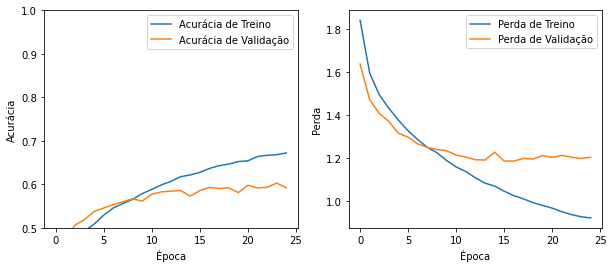

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()

## Resultado

...

# Terceiro modelo

Neste terceiro modelo vamos precisar de mais poder de processamento. Nos ultimos modelos conseguimos diminuir o overfitting graças a algumas técnicas, porém não conseguimos uma boa acurácia. Neste novo modelo vamos aumentar a acurácia evitando ao máximo overfit. 

Para isso vamos usar 5 camadas(128, 128, 64, 32, 32), com duas camadas de Dropout para evitar overfit.

Depois de Planificarmos os dados, criaremos duas camadas, agora com 64 camadas na com função de ativação relu.

In [37]:
model_v3 = Sequential()
model_v3.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), strides=1, padding='same', activation='relu'))
model_v3.add(MaxPooling2D(pool_size=(2,2)))
model_v3.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu'))
model_v3.add(MaxPooling2D(pool_size=(2,2)))
model_v3.add(Dropout(0.25))
model_v3.add(Conv2D(filters=64, kernel_size=(2, 2), strides=1, activation='relu'))
model_v3.add(MaxPooling2D(pool_size=(1,1)))
model_v3.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
model_v3.add(MaxPooling2D(pool_size=(1,1)))
model_v3.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
model_v3.add(MaxPooling2D(pool_size=(1,1)))
model_v3.add(Dropout(0.25))
model_v3.add(Flatten())
model_v3.add(Dense(64, activation='relu'))
model_v3.add(Dense(10, activation='softmax'))

model_v3.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

In [ ]:
history = model_v3.fit(x=x_train,y=y_train,epochs=10,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1250/1250 [==============================] - 214s 171ms/step - loss: 1.9280 - accuracy: 0.2840 - val_loss: 1.7022 - val_accuracy: 0.3836
Epoch 2/10
1250/1250 [==============================] - 208s 167ms/step - loss: 1.6777 - accuracy: 0.3890 - val_loss: 1.6145 - val_accuracy: 0.4193
Epoch 3/10
1250/1250 [==============================] - 205s 164ms/step - loss: 1.5838 - accuracy: 0.4291 - val_loss: 1.5084 - val_accuracy: 0.4651
Epoch 4/10
1250/1250 [==============================] - 203s 163ms/step - loss: 1.5169 - accuracy: 0.4550 - val_loss: 1.4646 - val_accuracy: 0.4750
Epoch 5/10
1250/1250 [==============================] - 207s 166ms/step - loss: 1.4710 - accuracy: 0.4740 - val_loss: 1.4076 - val_accuracy: 0.5012
Epoch 6/10
 164/1250 [==>...........................] - ETA: 2:50 - loss: 1.4424 - accuracy: 0.4867

In [ ]:
model_v3.save_weights('model_v3.h5')

## Analisando

In [ ]:
model_v3.evaluate(x_validation, y_validation)

## Resultados

# Quarto modelo

In [12]:
import torch
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch import nn

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [14]:
transform_train = transforms.Compose([transforms.Resize((32,32)),  #resises the image so it can be perfect for our model.
                                      transforms.RandomHorizontalFlip(), # FLips the image w.r.t horizontal axis
                                      transforms.RandomRotation(10),     #Rotates the image to a specified angel
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                                      transforms.ToTensor(), # comvert the image to tensor so that it can work with torch
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #Normalize all the images
                               ])

transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train) # Data augmentation is only done on training images
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [15]:
def im_convert(tensor):  
  image = tensor.cpu().clone().detach().numpy() # This process will happen in normal cpu.
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [16]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

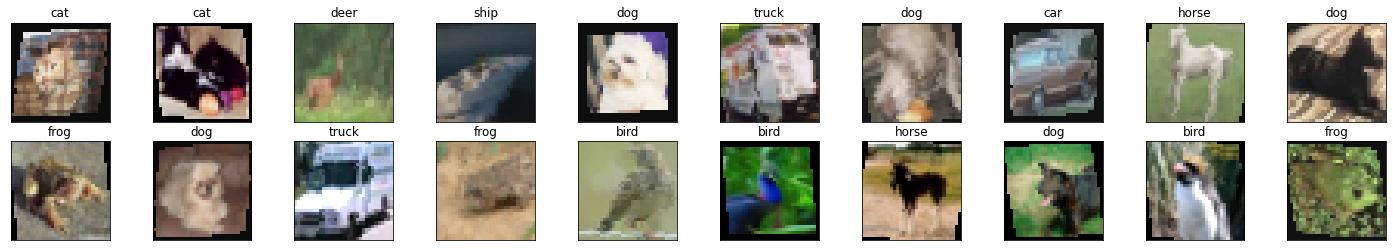

In [17]:
dataiter = iter(training_loader) # converting our train_dataloader to iterable so that we can iter through it. 
images, labels = dataiter.next() #going from 1st batch of 100 images to the next batch
fig = plt.figure(figsize=(25, 4)) 

# We plot 20 images from our train_dataset
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[]) 
  plt.imshow(im_convert(images[idx])) #converting to numpy array as plt needs it.
  ax.set_title(classes[labels[idx].item()])

In [18]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1) # input is color image, hence 3 i/p channels. 16 filters, kernal size is tuned to 3 to avoid overfitting, stride is 1 , padding is 1 extract all edge features.
      self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1) # We double the feature maps for every conv layer as in pratice it is really good.
      self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
      self.fc1 = nn.Linear(4*4*64, 500) # I/p image size is 32*32, after 3 MaxPooling layers it reduces to 4*4 and 64 because our last conv layer has 64 outputs. Output nodes is 500
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10) # output nodes are 10 because our dataset have 10 different categories
    def forward(self, x):
      x = F.relu(self.conv1(x)) #Apply relu to each output of conv layer.
      x = F.max_pool2d(x, 2, 2) # Max pooling layer with kernal of 2 and stride of 2
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv3(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*64) # flatten our images to 1D to input it to the fully connected layers
      x = F.relu(self.fc1(x))
      x = self.dropout1(x) # Applying dropout b/t layers which exchange highest parameters. This is a good practice
      x = self.fc2(x)
      return x

In [19]:
model = LeNet().to(device) # run our model on cuda GPU for faster results
model

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [20]:
criterion = nn.CrossEntropyLoss() # same as categorical_crossentropy loss used in Keras models which runs on Tensorflow
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) # fine tuned the lr

In [22]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs): # training our model, put input according to every batch.
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device) # input to device as our model is running in mentioned device.
    labels = labels.to(device)
    outputs = model(inputs) # every batch of 100 images are put as an input.
    loss = criterion(outputs, labels) # Calc loss after each batch i/p by comparing it to actual labels. 
    
    optimizer.zero_grad() #setting the initial gradient to 0
    loss.backward() # backpropagating the loss
    optimizer.step() # updating the weights and bias values for every single step.
    
    _, preds = torch.max(outputs, 1) # taking the highest value of prediction.
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data) # calculating te accuracy by taking the sum of all the correct predictions in a batch.

  else:
    with torch.no_grad(): # we do not need gradient for validation.
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader) # loss per epoch
    epoch_acc = running_corrects.float()/ len(training_loader) # accuracy per epoch
    running_loss_history.append(epoch_loss) # appending for displaying 
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 1.6157, acc 41.0100 
validation loss: 1.4155, validation acc 47.8800 
epoch : 2
training loss: 1.3687, acc 50.4720 
validation loss: 1.2258, validation acc 56.3700 
epoch : 3
training loss: 1.2483, acc 55.2780 
validation loss: 1.1061, validation acc 60.0900 
epoch : 4
training loss: 1.1600, acc 58.7760 
validation loss: 1.0629, validation acc 62.2700 
epoch : 5
training loss: 1.0946, acc 61.0960 
validation loss: 0.9798, validation acc 65.6000 
epoch : 6
training loss: 1.0468, acc 62.9620 
validation loss: 0.9654, validation acc 66.2100 
epoch : 7
training loss: 1.0074, acc 64.2220 
validation loss: 0.9323, validation acc 67.0200 
epoch : 8
training loss: 0.9795, acc 65.3620 
validation loss: 0.8982, validation acc 68.9800 
epoch : 9
training loss: 0.9472, acc 66.6600 
validation loss: 0.8599, validation acc 70.1200 
epoch : 10
training loss: 0.9185, acc 67.6680 
validation loss: 0.8655, validation acc 70.1300 


In [27]:
torch.save(model.state_dict(), "model_v4.pth")

In [31]:
model = LeNet()
model.load_state_dict(torch.load("model_v4.pth"))
model.eval()

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

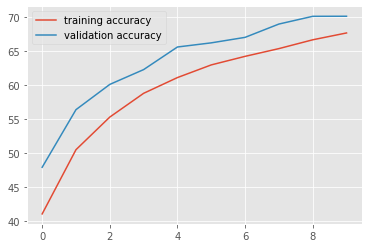

In [24]:
plt.style.use('ggplot')
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

# Comparando modelos